# Example notebook showing how to use the Movie class

In [1]:
from mpl_moviemaker import Movie
import matplotlib.pyplot as plt
import numpy as np
import figrid as fg

matplotlib_style = 'dark_background'
plt.style.use(matplotlib_style)

# A simple example
The first example shows a very basic use case with a single axis on a matplotlib figure canvas.  

We'll plot the sine of theta, iterating over increasing values of theta.

## First define a function to specify the figure and axes
In this case we're going to have a figure with just a single axis.   
The function must return the figure and axes as a tuple

In [2]:
def build_figure_and_axis():
    '''
    a simple function to build a figure and axis
    '''
    fig, ax = plt.subplots(figsize=(12, 4.25))
    
    return fig, ax

## Next define a function that will generate a plot given a particular frame number
The first three arguments must specify the:
* figure canvas
* axis (or axes) handles (can be a single axis, an array of axes, or a dict with axes as values)
* frame number (int)  

In [3]:
def plot_sine(fig, ax, frame_number, linewidth=4, linecolor='MediumSeaGreen'):
    '''
    a simple function to plot the sine function, where theta is frame_number*pi/180
    '''
    theta = (frame_number)*np.pi/180
    x = np.arange(theta-360*np.pi/180, theta+180*np.pi/180, 0.01)
    ax.plot(x, np.sin(x), color=linecolor, linewidth=linewidth)
    ax.axvline(theta, color='white', alpha=0.5)
    
    ax.plot(
        theta,
        np.sin(theta),
        color='white',
        marker='o',
    )
    
    ax.set_xlim(theta-180*np.pi/180, theta+180*np.pi/180)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel('$sin(\Theta)$')
    ax.set_title('sine({:0.2f}) = {:0.2f}'.format(theta, np.sin(theta)),rotation=0, ha='center', va='top')


For a given frame (say frame 80), the plot would look like this:

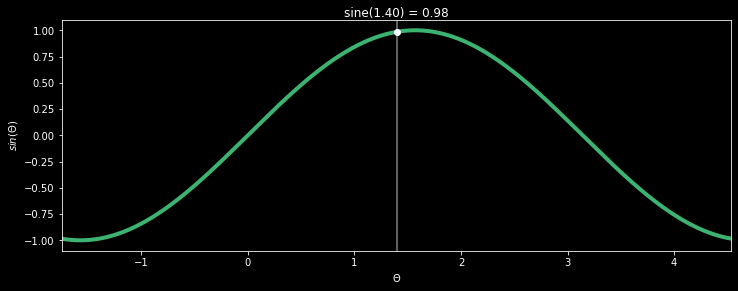

In [4]:
fig, ax = build_figure_and_axis()
plot_sine(fig, ax, frame_number=80, linewidth=4)

## Then instantiate the movie class, passing in the desired parameters
Note that the filename ends in `.gif`, which will result in an animated gif. Using `.avi` or `.mp4` will result in movie files.

In [5]:
movie = Movie(
    start_frame=0,
    end_frame=360,
    fps=60,
    frame_interval=5,
    output_filename='sample_movie_1.gif',
    fig_ax_func=build_figure_and_axis,
    frame_func=plot_sine
)

## Finally, call the `make_movie()` method on the class.
The movie will generate. This example should take only a few seconds, but longer or more complex plots can be quite slow.

73it [00:12,  5.67it/s]                                                                                                                                                                                                                                       


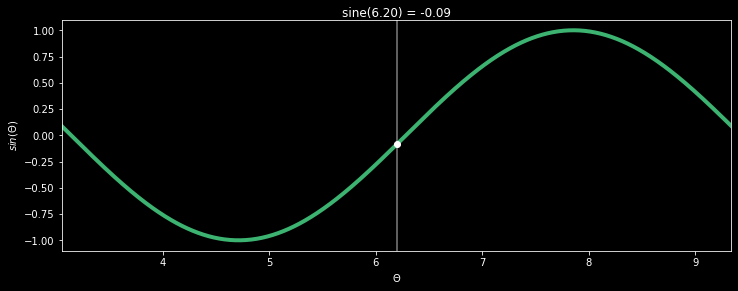

In [6]:
movie.make_movie()

# A slightly more complicated example
We'll extend our example above to include a second plot showing a circle with a unit vector defined by theta.  
We'll use the `figrid` package to define the axis locations. This package wraps the matplotlib gridspec function to define axes on a grid.

## As before, define a function to generate the figure and axes
Here we will define the axes as a dictionary where the keys are strings and the values are matplotlib axes as defined by figrid's `place_axes_on_grid` function. Defining axes in a dictionary like this (with easily interpretable keys) can be very useful when the layout starts to get more complicated.

In [7]:
def build_extended_figure_and_axis():
    '''
    a simple function to build a figure and axis
    '''
    fig = plt.figure(figsize=(12,4.25))
    ax = {
        'circle': fg.place_axes_on_grid(fig, xspan=(0, 0.35), yspan=(0, 1)),
        'sine': fg.place_axes_on_grid(fig, xspan=(0.48, 1), yspan=(0, 1))
    }
    
    return fig, ax

## Define a new function to plot a circle with the unit vector at the angle theta

In [8]:
def plot_circle(fig, ax, frame_number, linewidth=4, linecolor='MediumSeaGreen', circlecolor='OrangeRed'):
    '''
    a simple function for plotting a circle with the unit vector defined by the frame number
    '''
    # plot the circle
    xc = np.arange(-1, 1 + 0.0001, 0.0001)
    ax.plot(xc, np.sqrt(1 - xc**2), color=circlecolor, linewidth=linewidth)
    ax.plot(xc, -np.sqrt(1 - xc**2), color=circlecolor, linewidth=linewidth)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    
    # plot the unit vector
    theta = (frame_number)*np.pi/180
    theta_minus_90 = (frame_number - 90)*np.pi/180
    h = np.arange(0, 1, 0.01)
    ax.plot(
        h*np.sin(theta_minus_90),
        h*np.cos(theta_minus_90),
        color=linecolor, 
        linewidth=linewidth
    )
    
    # put a dot at the end of the unit vector
    ax.plot(
        -1*np.cos(theta),
        np.sin(theta),
        color='white',
        marker='o',
    )
    ax.set_ylim(-1.1, 1.1)

## Make a new figure function that calls both the `plot_sine` and `plot_circle` functions, as well as some args and kwargs.

In [9]:
def plot_both_circle_and_sine(fig, ax, frame_number, *args, **kwargs):
    plot_circle(fig, ax['circle'], frame_number=frame_number, **kwargs)
    plot_sine(fig, ax['sine'], frame_number=frame_number, **kwargs)

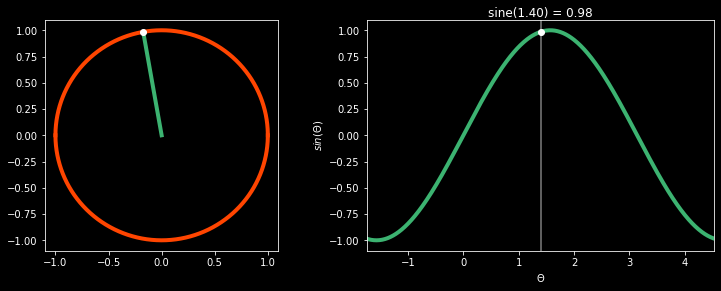

In [10]:
fig, ax = build_extended_figure_and_axis()
plot_both_circle_and_sine(fig, ax, frame_number=80)

## Instantiate movie class
We give it a new filename.  
Note that we can also pass keyword arguments. In this case, we'll specify the linewidth and change the linecolor from the default.

In [11]:
movie = Movie(
    start_frame=0,
    end_frame=360,
    fps=60,
    frame_interval=5,
    output_filename='sample_movie_2.gif',
    fig_ax_func=build_extended_figure_and_axis,
    frame_func=plot_both_circle_and_sine,
    linewidth=4, 
    linecolor='DodgerBlue',
)

73it [00:25,  2.88it/s]                                                                                                                                                                                                                                       


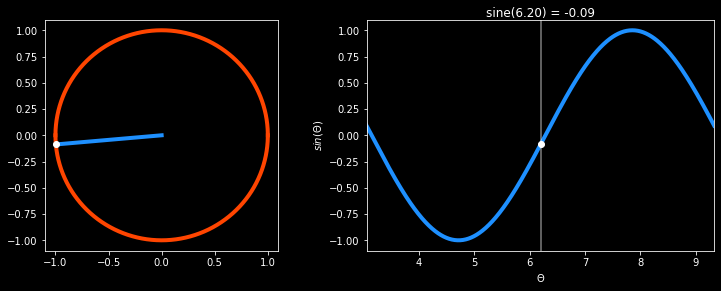

In [12]:
movie.make_movie()